In [1]:
import pandas as pd
import numpy as np
import matplotlib
import matplotlib.pyplot as plt

In [2]:
# Source: https://www.census.gov/programs-surveys/stc/data/datasets.html
url='https://www2.census.gov/programs-surveys/stc/datasets/2022/FY2022-Flat-File.txt'
# pd.read_table(url,sep=',')
df=pd.read_table('US_FY2022-Flat-File.txt',sep=',')
df.head()

,item,US,AL,AK,AZ,AR,CA,CO,CT,DE,...,SD,TN,TX,UT,VT,VA,WA,WV,WI,WY
0,T01,24494282,495753,125219,1254846,1318147,2986154,X,X,X,...,X,X,X,X,1235599,54712,4399803,7908,88838,268292
1,T09,429630537,4329546,X,11169103,4587956,52228035,4286196,5193413,X,...,1524337,12887107,48866003,4280780,545564,7097323,21477182,1655483,6978336,978080
2,T10,8199278,271442,42032,88925,75051,432629,55555,71123,30911,...,21322,292498,1655325,18394,12064,274380,481287,20775,73769,2204
3,T11,11123029,0,6805,8198,85468,X,153595,260239,X,...,12323,46079,17720,X,X,37153,4432,39214,108,5402
4,T12,28759802,513226,68590,732224,345234,3319048,338355,191176,146051,...,97571,1223183,3121923,189609,68799,683923,823878,135847,247174,33611


Data of most of the columns are of type string. I want them to be float

In [3]:
type(df.AK[0]),df.AK[0]

(str, '125219')

In [4]:
df.replace('X',np.nan,inplace=True)     # replace all 'X' values by NaN
df.head()

,item,US,AL,AK,AZ,AR,CA,CO,CT,DE,...,SD,TN,TX,UT,VT,VA,WA,WV,WI,WY
0,T01,24494282,495753,125219,1254846,1318147,2986154,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,1235599,54712,4399803,7908,88838,268292
1,T09,429630537,4329546,NaN,11169103,4587956,52228035,4286196,5193413,NaN,...,1524337,12887107,48866003,4280780,545564,7097323,21477182,1655483,6978336,978080
2,T10,8199278,271442,42032,88925,75051,432629,55555,71123,30911,...,21322,292498,1655325,18394,12064,274380,481287,20775,73769,2204
3,T11,11123029,0,6805,8198,85468,NaN,153595,260239,NaN,...,12323,46079,17720,NaN,NaN,37153,4432,39214,108,5402
4,T12,28759802,513226,68590,732224,345234,3319048,338355,191176,146051,...,97571,1223183,3121923,189609,68799,683923,823878,135847,247174,33611


In [5]:
type(df.AK[0]),df.AK[0]

(str, '125219')

In [6]:
for col in df.columns[1:]:              # convert data from to be float, for all columns except 'items' column which is the type of tax
    df[col]=df[col].astype(float)

type(df.AK[0]),df.AK[0],df.CA[3]        # verify if previous string data is currently float data

(numpy.float64, 125219.0, nan)

I want to know which state generate more tax revenue, by type of taxes

In [7]:
df_tax=pd.DataFrame({'Item':list(df.item),                         # Tax ID
              'Max':df.iloc[:,2:].max(axis=1).tolist()})    # Maximum value of tax revenu, by type
df_tax.head()


,Item,Max
0,T01,4399803.0
1,T09,52228035.0
2,T10,1655325.0
3,T11,1758352.0
4,T12,3319048.0


In [8]:
df['KY'][14],df_tax.Max[14]

(224860.0, 5141552.0)

In [9]:
y=list()                                    # a list to receive the codes of the states with maximum value of taxes
for i in range(df_tax.shape[0]):                # loop to indicate the type of tax related for which the state name should be found where the tax is equalt to maximum value
    y.append([col for col in df.columns if df[col][i]==df_tax.Max[i]][0])
    i=i+1

df_tax['State']=y                           # Add States with maximum tax revenue, by type of tax
df_tax



,Item,Max,State
0,T01,4399803.0,WA
1,T09,52228035.0,CA
2,T10,1655325.0,TX
3,T11,1758352.0,PA
4,T12,3319048.0,CA
5,T13,8638712.0,CA
6,T14,47733.0,KY
7,T15,1799972.0,FL
8,T16,1853535.0,CA
9,T19,7508290.0,TX


In [60]:
df_desc=pd.read_excel('taxitemcodesanddescriptions.xls')
df_desc.head()

,Item Code,Description
0,T01,Property Taxes
1,T09,General Sales and Gross Receipts Taxes
2,T10,Alcoholic Beverages Sales Tax
3,T11,Amusements Sales Tax
4,T12,Insurance Premiums Sales Tax


In [62]:
pd.merge(df_tax,df_desc,left_on='Item',right_on='Item Code')

,Item,Max,State,Item Code,Description
0,T01,4399803.0,WA,T01,Property Taxes
1,T09,52228035.0,CA,T09,General Sales and Gross Receipts Taxes
2,T10,1655325.0,TX,T10,Alcoholic Beverages Sales Tax
3,T11,1758352.0,PA,T11,Amusements Sales Tax
4,T12,3319048.0,CA,T12,Insurance Premiums Sales Tax
5,T13,8638712.0,CA,T13,Motor Fuels Sales Tax
6,T14,47733.0,KY,T14,Pari-mutuels Sales Tax
7,T15,1799972.0,FL,T15,Public Utilities Sales Tax
8,T16,1853535.0,CA,T16,Tobacco Products Sales Tax
9,T19,7508290.0,TX,T19,Other Selective Sales and Gross Receipts Taxes


In [79]:
dus_tax=pd.DataFrame({'Item':df.item,'Tax':df.iloc[:,2:].sum(axis=1)})
dus_tax.head()

,Item,Tax
0,T01,24494282.0
1,T09,429630537.0
2,T10,8199278.0
3,T11,11123029.0
4,T12,28759802.0


In [103]:
dd=pd.merge(dus_tax,df_desc,left_on='Item',right_on='Item Code')
dd

,Item,Tax,Item Code,Description
0,T01,24494282.0,T01,Property Taxes
1,T09,429630537.0,T09,General Sales and Gross Receipts Taxes
2,T10,8199278.0,T10,Alcoholic Beverages Sales Tax
3,T11,11123029.0,T11,Amusements Sales Tax
4,T12,28759802.0,T12,Insurance Premiums Sales Tax
5,T13,54678184.0,T13,Motor Fuels Sales Tax
6,T14,176642.0,T14,Pari-mutuels Sales Tax
7,T15,12555449.0,T15,Public Utilities Sales Tax
8,T16,18287214.0,T16,Tobacco Products Sales Tax
9,T19,59374495.0,T19,Other Selective Sales and Gross Receipts Taxes


Text(-1, -1.5, 'Source: By Raulin L. Cadet, with data from the U.S. Census Bureau.')

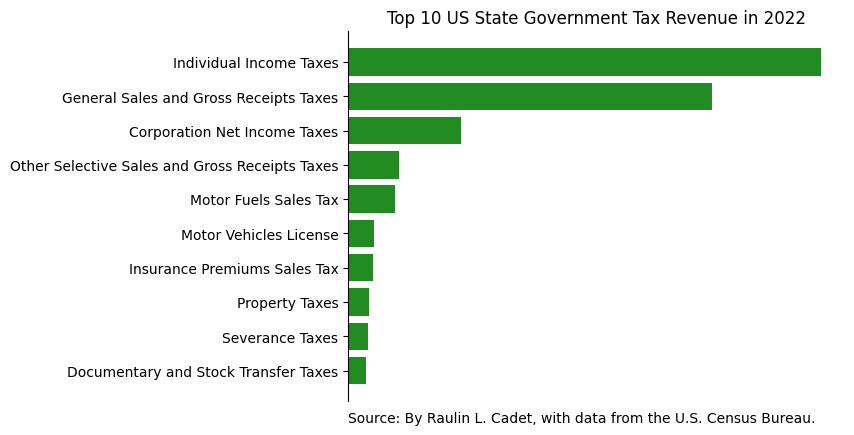

In [127]:
dd=dd.sort_values('Tax',ascending=True)
dd1=dd.tail(10)
fig=plt.subplot()
plt.barh(dd1['Description'],dd1.Tax,color='forestgreen')
# for i in range(dd1.shape[0]):
#     plt.text(dd1.Tax[i],dd1.Description[i],s=dd1.Tax[i]/1000000)
plt.title('Top 10 US State Government Tax Revenue in 2022')
fig.spines[['top','right','bottom']].set_visible(False)
fig.set_xticks([])
plt.text(-1,-1.5,s='Source: By Raulin L. Cadet, with data from the U.S. Census Bureau.')
# Top 10 US State Tax Revenues: 2022 Insights